*В данной работе используйте информацию, приведенную в методическом пособии:*
- *Козулин Цифровая обработка сигналов Python, стр. 72-78.*
<br><br>

*Также см. Верлань А.Ф., Сизиков В.С. - Интегральные уравнения. методы, алгоритмы, программы.*
- *Справочник. Пример 3.16, стр. 181-183.*

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

!echo -e '\033[0;36mWell, this is it... for Python!'

# plt.rcParams['axes.facecolor'] = 'black'
# plt.rcParams['figure.facecolor'] = 'black'
# plt.rcParams['text.color'] = 'white'
plt.rcParams['figure.figsize'] = (8, 8)

Well, this is it... for Python!


**(1)** С помощью **метода квадратур** найдите приближенное решение уравнения:

$ y(x) = \frac{5}{6}*x + \frac{1}{2} * \int^1_0 x*s*y(s)*ds; \ x \in [0,1] $

Если его точное решение — $y(x) = x$.

———

Запишем это уравнение в общем виде, в узлах сетки $x_1, x_2, ..., x_n$:

$ y(x) = \lambda * \int^b_a ​K(x,s) * y(s) * ds + f(x) $
- $\lambda = \frac{1}{2}$,
- $K(x,s) = x*s$,
- $f(x) = \frac{5}{6}*x$,
- $a = 0$,
- $b = 1$.

In [2]:
Lambda = (1/2)

K = lambda x, s: x * s

f = lambda x: (5/6) * x

a = 0; b = 1

# Количество узлов (чем больше тем точнее)
n = 10

# Узлы сетки
x = np.arange(a, b+(1/n), (1/n))
x = x.reshape(len(x), 1)

Аппроксимируем интеграл конечной суммой по формуле квадратуры:

$ y(x_i) - \lambda * \sum^n_{j=1} w_j * K(x_i, x_j) * y(x_j) = f(x_i) $
- $x_j = x_1, x_2, ..., x_n$
- $w$ — веса квадратурной формулы (некоторые уже посчитанные кофеценты узлов при разбиении на $n$ узлов)

Или, подставляя обратно значения выше:

$ y(x_i​) - \frac{1}{2} * \sum^n_{j=1} w_j * x_i * x_j * y(x_j) = \frac{5}{6}*x_i $

Далее, упрощая:

$ y(x_i​) - \sum^n_{j=1} A_{ij} * y(x_j) = B_i $
- $x_i, x_j = x_1, x_2, ..., x_n$
- $A_{ij} = \frac{1}{2} * w_j * K(x_i, x_j)$
- $B_i = \frac{5}{6} * x_i$

В матричном виде это будет $A*y = B$ — т.е. интеграл можно приближённо посчитать как систему $n$ линейных уравнений!

In [3]:
# Веса кофецентов (здесь определяются равномерно, а вообще зависит от задачи)
w = (1/n)

# Сперва посчитаем матрицу системы A и вектор функции B
A = np.zeros((len(x), len(x)))
B = np.zeros((len(x), 1))

for i in range(len(x)):
    B[i] = f(x[i])

    for j in range(len(x)):
        A[i, j] = -Lambda * w * K(x[i], x[j])

    # Не забываем, что A -- это диагональная матрица
    A[i, i] += 1


print(A, '\n---\n', B)

[[ 1.     -0.     -0.     -0.     -0.     -0.     -0.     -0.     -0.
  -0.     -0.    ]
 [-0.      0.9995 -0.001  -0.0015 -0.002  -0.0025 -0.003  -0.0035 -0.004
  -0.0045 -0.005 ]
 [-0.     -0.001   0.998  -0.003  -0.004  -0.005  -0.006  -0.007  -0.008
  -0.009  -0.01  ]
 [-0.     -0.0015 -0.003   0.9955 -0.006  -0.0075 -0.009  -0.0105 -0.012
  -0.0135 -0.015 ]
 [-0.     -0.002  -0.004  -0.006   0.992  -0.01   -0.012  -0.014  -0.016
  -0.018  -0.02  ]
 [-0.     -0.0025 -0.005  -0.0075 -0.01    0.9875 -0.015  -0.0175 -0.02
  -0.0225 -0.025 ]
 [-0.     -0.003  -0.006  -0.009  -0.012  -0.015   0.982  -0.021  -0.024
  -0.027  -0.03  ]
 [-0.     -0.0035 -0.007  -0.0105 -0.014  -0.0175 -0.021   0.9755 -0.028
  -0.0315 -0.035 ]
 [-0.     -0.004  -0.008  -0.012  -0.016  -0.02   -0.024  -0.028   0.968
  -0.036  -0.04  ]
 [-0.     -0.0045 -0.009  -0.0135 -0.018  -0.0225 -0.027  -0.0315 -0.036
   0.9595 -0.045 ]
 [-0.     -0.005  -0.01   -0.015  -0.02   -0.025  -0.03   -0.035  -0.04
  -0.045   0

/tmp/ipykernel_112351/1899332564.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i, j] = -Lambda * w * K(x[i], x[j])


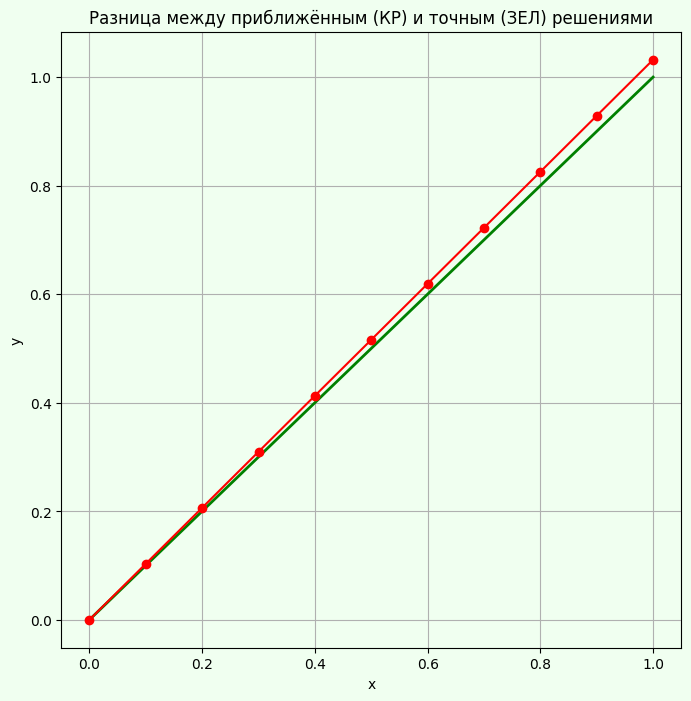

In [4]:
# Теперь решаем как систему из n линейных уравнений
y_approx = np.linalg.solve(A, B)

# Точное решение (для сравнения)
y_real = [x[i] for i in range(len(x))] # y(x) = x


plt.rcParams['axes.facecolor'] = 'honeydew' # mintcream
plt.rcParams['figure.facecolor'] = 'honeydew' # mintcream
plt.plot(x, y_real, '-g', linewidth=2)
plt.plot(x, y_approx, '-or')

plt.title('Разница между приближённым (КР) и точным (ЗЕЛ) решениями')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

**(2★)** С помощью **метода вырожденных ядер** найдите приближенное решение уравнения:

$ y(x) + \int^1_0 x * (\exp(x*s) - 1) * y(s) * ds = \exp(x) - 1; \ x \in [0,1] $

$ \implies $

$ y(x) = \exp(x) - 1 - \int^1_0 x * (\exp(x*s) - 1) * y(s) * ds; \ x \in [0,1] $

Точным решением уравнения является функция $y(x) = 1$.

<!-- В учебнике из референсов дано буквально это же уравнение, только вместо x у нас 1 — ЛООООЛ!! -->

–––

Запишем уравнение в общем виде:

$ y(x) + \int^b_a K(x,s) * y(s) * ds = f(x) $

- $\lambda = 1$,
- $K(x,s) = x*(\exp(x*s) - 1)$,
- $f(x) = \exp(x) - 1$,
- $a = 0$,
- $b = 1$.

In [5]:
Lambda = 1

# K = lambda x, s: x * np.exp(x*s) - 1

f = lambda x: np.exp(x) - x

a = 0; b = 1

# Количество узлов (чем больше тем точнее)
n = 10

# Узлы сетки
x = np.arange(a, b+(1/n), (1/n))
x = x.reshape(len(x), 1)

Для получения [вырожденного ядра](https://scask.ru/m_book_ieq.php?id=7) (ядра такого, которое можно представить в виде конечной суммы произведений двух фукнций: $K(t,s) = \sum^n_{i=1} \alpha_i(t) * \beta_i(s)$) воспользуемся разложением в ряд Тейлора:

$ K(x,s) ≈ \phi_1(x) * \psi_1(s) + \phi_2(x) * \psi_2(s) + ... $


Таким образом:

$ \exp(x*s) ≈ 1 + x*s + \frac{(x*s)^2}{2} + \frac{(x*s)^3}{6} + ...​ $

$ \implies $

$ K(x,s) = x*(\exp(x*s) - 1) ≈ x*(\cancel{1 +} \ x*s + \frac{(x*s)^2}{2} + \frac{(x*s)^3}{6} + ... \ \cancel{- 1}) = x^2*s + \frac{x^3*s^2}{2} + \frac{x^4*s^3}{6} + ... $

Или, записывая в матричной форме: $ A*C = B $

In [6]:
def factorial(n):
    if int(n) < 2:
        return int(n)
    else:
        return int(n) * factorial(n-1)

# Ряды Тейлора для функций вырожденного ядра
def alpha(t, i):
    return [t**(k + 2) for k in range(i)]

def beta(t, i):
    return [t**(k + 1) / factorial(k + 1) for k in range(i)]

# Выражение A и B через alpha и beta
def A_fun(t, m, k, i):
    return beta(t, i)[m] * alpha(t, i)[k]

def B_fun(t, m, f, i):
    return beta(t, i)[m] * f(t)


# Число членов ряда Тейлора (чем больше, тем точнее приближение)
N_3 = 3
N_5 = 5


# Посчитаем матрицу системы A и вектор функции B
A_3 = np.zeros((N_3, N_3)); A_5 = np.zeros((N_5, N_5))
B_3 = np.zeros((N_3, 1)); B_5 = np.zeros((N_5, 1))

for i in range(N_3):
    B_3[i] = integrate.quad(B_fun, a, b, args=(i, f, N_3))[0]
    for j in range(N_3):
        A_3[i][j] += Lambda * integrate.quad(A_fun, a, b, args=(i, j, N_3))[0]
    # Не забываем, что A -- это диагональная матрица
    A_3[i, i] += 1

for i in range(N_5):
    B_5[i] = integrate.quad(B_fun, a, b, args=(i, f, N_5))[0]
    for j in range(N_5):
        A_5[i][j] += Lambda * integrate.quad(A_fun, a, b, args=(i, j, N_5))[0]
    # Не забываем, что A -- это диагональная матрица
    A_5[i, i] += 1


print(A_5, '\n---\n', B_5)

[[1.25000000e+00 2.00000000e-01 1.66666667e-01 1.42857143e-01
  1.25000000e-01]
 [1.00000000e-01 1.08333333e+00 7.14285714e-02 6.25000000e-02
  5.55555556e-02]
 [2.77777778e-02 2.38095238e-02 1.02083333e+00 1.85185185e-02
  1.66666667e-02]
 [5.95238095e-03 5.20833333e-03 4.62962963e-03 1.00416667e+00
  3.78787879e-03]
 [1.04166667e-03 9.25925926e-04 8.33333333e-04 7.57575758e-04
  1.00069444e+00]] 
---
 [[0.66666667]
 [0.23414091]
 [0.06057272]
 [0.01241124]
 [0.00210619]]


Тогда уравнение получится вот таким:

$ y(x) = \exp(x) - 1 - \int^1_0 (x^2*s + \frac{x^3*s^2}{2} + \frac{x^4*s^3}{6} + ...) * y(s) * ds $

Или, если записать члены разложения ядра как $C_i$:

$ y(x) = \exp(x) - 1 - C_1*x^2 - C_2*x^3 - C_3*x^4 - ... $, где
- $ C_1 = \int^1_0 s*y(s)*ds $,
- $ C_2 = \int^1_0 \frac{s^2}{2}*y(s)*ds $,
- $ C_3 = \int^1_0 \frac{s^3}{6}*y(s)*ds $,
- $ ... $.

Подставив в последние формулы $ y(x) = \exp(x) - 1 - C_1*x^2 - C_2*x^3 - C_3*x^4 - ... $, получаем систему:

- $ C_1 = \int^1_0 s*(\exp(x) - 1 - C_1*x^2 - C_2*x^3 - C_3*x^4)*ds $,
- $ C_2 = \int^1_0 \frac{s^2}{2}*(\exp(x) - 1 - C_1*x^2 - C_2*x^3 - C_3*x^4)*ds $,
- $ C_3 = \int^1_0 \frac{s^3}{6}*(\exp(x) - 1 - C_1*x^2 - C_2*x^3 - C_3*x^4)*ds $,
- $ ... $.

Остаётся лишь вычислить все $C_i$, а затем посчитать приближённое уравнение по формуле выше:

$ y(x) = f(x) - C_1*x^2 - C_2*x^3 - C_3*x^4 - ... $

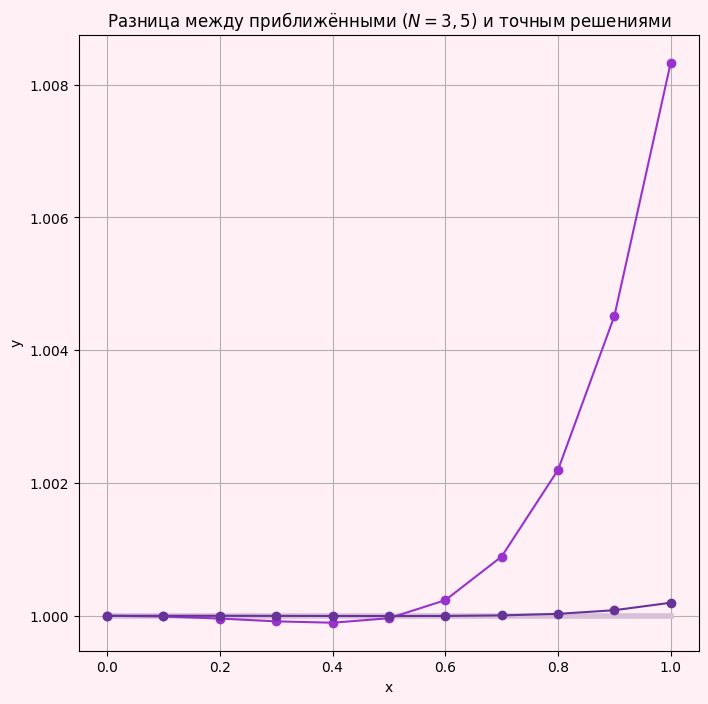

In [7]:
# Решаем систему уравнений, чтобы вычислить все члены разложения ядра C_i
C_3 = np.linalg.solve(A_3, B_3)
C_5 = np.linalg.solve(A_5, B_5)

# Теперь подставяем в формулу приблжённого уравнения
y_approx_3 = f(x); y_approx_5 = f(x)

for k in range(N_3):
    y_approx_3 -= Lambda * C_3[k] * alpha(x, N_3)[k]

for k in range(N_5):
    y_approx_5 -= Lambda * C_5[k] * alpha(x, N_5)[k]


# Точное решение (для сравнения)
y_real = [1 for i in range(len(x))] # y(x) = 1


plt.rcParams['axes.facecolor'] = 'lavenderblush'
plt.rcParams['figure.facecolor'] = 'lavenderblush'
plt.plot(x, y_real, color='thistle', linewidth=4)
plt.plot(x, y_approx_3, color='darkorchid', marker='o')
plt.plot(x, y_approx_5, color='rebeccapurple', marker='o')

plt.title('Разница между приближёнными ($N = 3, 5$) и точным решениями')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

Как видно из графика, на этом отрезке уже при вычислении до 3 членов ряда ошибка становится допустимо небольшой, а при вычислении 5 и выше вообще становится практически незаметной.

———

*<small>ачё пачиму светлеет за окном… всмыслий уже 7:50… непон…</small>*